<a href="https://colab.research.google.com/github/manh04/Do_An_2_Ap_dung_ki_thuat_phan_cum_de_phan_loai_khach_hang_dua_tren_hanh_vi_mua_sam_-truc_tuyen/blob/main/%C4%90%E1%BB%93_%C3%81n2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ĐỒ ÁN 2: ÁP DỤNG KỸ THUẬT PHÂN CỤM ĐỂ PHÂN LOẠI KHÁCH HÀNG DỰA TRÊN HÀNH VI MUA SẮM TRỰC TUYẾN**

**Giảng viên hướng dẫn**: Ths.Lê Hằng Anh

**Nhóm sinh viên thực hiện**:
- Nguyễn Đình Mạnh 22174600037 - Nhóm trưởng
- Nguyễn Mạnh Tiến 22174600066
- Phạm Thị Hà Nam 22174600009
- Nguyễn Thị Như 22174600047
- Trần Thị Thu Trang 22174600028

**Phân công thực hiện**

| **Bước**                           | **Thực hiện**                                                                                                                                                                                                 |
|-------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **1. Chọn bộ dữ liệu**    |                                                **Nguyễn Thị Như**                                                                                                                                                                          |
| **2. Chuẩn bị dữ liệu**    |                                                **Trần Thị Thu Trang**                                                                                                                                                                          |
| **3. Trực quan hóa bộ dữ liệu**|                                                **Nguyễn Mạnh Tiến**                                                                                                                                                           |
| **4. Xử lí dữ liệu** |                                                                                               **Phạm Thị Hà Nam**                                                                                                                    |
| **5. Tính toán đặc trưng RFM** |                                                                                    **Nguyễn Đình Mạnh**                                                                                                                       |
| **6.Xây dựng và Đánh giá mô hình** |                                                                                      **Nguyễn Thị Như**                                                                                                                     |
                                               

## **I. Giới thiệu bài toán**

**1.1. Mục tiêu bài toán**
- Trích xuất các chỉ số hành vi tiêu dùng cốt lõi từ dữ liệu giao dịch, bao gồm:
 - Recency: Khoảng thời gian kể từ lần mua hàng gần nhất.
 - Frequency: Tần suất mua hàng.
 - Monetary: Tổng giá trị mua hàng.
 - Xây dựng mô hình phân cụm khách hàng sử dụng các thuật toán như K-Means, Hierarchical Clustering, hoặc DBSCAN, nhằm chia khách hàng thành các nhóm có hành vi tương đồng.
- Phân tích đặc điểm từng nhóm khách hàng sau phân cụm để hiểu rõ chân dung tiêu dùng của từng phân khúc và đánh giá giá trị kinh tế tương ứng.
-	Đề xuất các định hướng chiến lược tiếp thị và chăm sóc khách hàng phù hợp với từng nhóm như: duy trì nhóm khách hàng trung thành, tái kích hoạt nhóm khách hàng không còn mua sắm, và tối ưu chuyển đổi ở nhóm tiềm năng.


**1.2. Bối cảnh thị trường**

- Trong thời đại số, thương mại điện tử định hình cách doanh nghiệp tương tác với khách hàng. Hiểu hành vi mua sắm trực tuyến giúp cá nhân hóa trải nghiệm, tối ưu tiếp thị, và tăng lợi thế cạnh tranh. Dữ liệu giao dịch trở thành nguồn lực quan trọng, hỗ trợ phân tích thói quen khách hàng để đưa ra quyết định kinh doanh chính xác.

**1.3. Giải pháp**
- Trong thời đại số, thương mại điện tử định hình cách doanh nghiệp tương tác với khách hàng. Hiểu hành vi mua sắm trực tuyến giúp cá nhân hóa trải nghiệm, tối ưu tiếp thị, và tăng lợi thế cạnh tranh. Dữ liệu giao dịch trở thành nguồn lực quan trọng, hỗ trợ phân tích thói quen khách hàng để đưa ra quyết định kinh doanh chính xác.

**1.4. Phương pháp**
- Sử dụng bộ dữ liệu như “Online Retail II (UCI)” năm 2011, các chỉ số về tần suất, chi tiêu, và thời gian mua được trích xuất để phân cụm khách hàng thành các nhóm như chi tiêu cao, mua thường xuyên, hoặc ít tương tác. Phân cụm này giúp cá nhân hóa khuyến mãi, chăm sóc khách hàng trọng điểm, và thiết kế chiến dịch tiếp thị hiệu quả hơn.

## **II. Tổng quan bộ dữ liệu - Online Retail II(2011)**


Bộ dữ liệu được sử dụng trong đồ án được trích xuất từ tập dữ liệu **Online Retail II**, thu thập bởi một công ty bán lẻ trực tuyến có trụ sở tại Vương quốc Anh. Dữ liệu này ghi nhận chi tiết các giao dịch mua bán trong năm 2011, bao gồm thông tin về hóa đơn, sản phẩm, khách hàng và quốc gia mua hàng.

---

**Thông tin các trường dữ liệu**

| Tên cột | Kiểu dữ liệu | Mô tả |
|--------|---------------|-------|
| `Invoice` | object | Mã số hóa đơn. Nếu mã bắt đầu bằng chữ "C" thì đó là hóa đơn bị hủy. |
| `StockCode` | object | Mã định danh sản phẩm. |
| `Description` | object | Tên/mô tả sản phẩm. |
| `Quantity` | int | Số lượng sản phẩm được mua trong mỗi giao dịch. |
| `InvoiceDate` | datetime | Ngày và giờ phát sinh giao dịch. |
| `Price` | float | Giá đơn vị của sản phẩm (tính bằng bảng Anh - GBP). |
| `Customer ID` | float | Mã định danh khách hàng. Có thể bị thiếu. |
| `Country` | object | Quốc gia nơi khách hàng sinh sống. |

---



## **III. Thực nghiệm**

### **3.1.Các thư viện cần thiết**

In [ ]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import pickle
import os

In [ ]:
# Thư viện cho mô hình
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

### **3.2. Chuẩn bị dữ liệu**

#### **3.2.1. Load dữ liệu**

In [ ]:
df = pd.read_csv("online_retail_2011_filtered.csv")

#### **3.2.2. Hiển thị thông tin cơ bản**

In [ ]:
# Hiển thị thông tin tổng quan của dữ liệu
df.info()

# Hiển thị 5 dòng đầu tiên của dữ liệu
print('5 dòng đầu tiên của dữ liệu:')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499429 entries, 0 to 499428
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      499429 non-null  object 
 1   StockCode    499429 non-null  object 
 2   Description  498100 non-null  object 
 3   Quantity     499429 non-null  int64  
 4   InvoiceDate  499429 non-null  object 
 5   Price        499429 non-null  float64
 6   Customer ID  379980 non-null  float64
 7   Country      499429 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 30.5+ MB
5 dòng đầu tiên của dữ liệu:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom


**Bộ dữ liệu bao gồm 499.429 dòng và 8 cột, trong đó:**
- Invoid: Mã hóa đơn
- StockCode: Mã sản phẩm
- Description: Mô tả sản phẩm
- Quantity: Số lượng bán
- InvoiceDate: Ngày giao dịch
- Price: Giá mỗi đơn vị
- Customer ID: Mã khách hàng
- Country: Quốc gia

#### **3.2.3.Thống kê mô tả**


In [ ]:
# Kiểu dữ liệu của từng cột
df.dtypes

,0
Invoice,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
Price,float64
Customer ID,float64
Country,object


- Kiểu chuỗi (object): Invoice, StockCode, Description, InvoiceDate và Country
- Kiểu số nguyên (int64): Quantity
- Kiểu số thực (float64): Price, Customer ID

In [ ]:
# Thống kê mô tả
df.describe()

,Quantity,Price,Customer ID
count,499429.000000,499429.000000,379980.000000
mean,9.679500,4.481720,15271.305856
std,226.515501,92.194676,1710.632743
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13923.000000
50%,3.000000,2.080000,15116.000000
75%,10.000000,4.130000,16770.000000
max,80995.000000,38970.000000,18287.000000


**Quantity (Số lượng)**

- Mean: 9.67 | Std: 226.51 ⇒ Độ lệch chuẩn cực cao, nhiều giá trị bất thường.

- Min: -80995 | Max: 80995 ⇒ Có giá trị âm và cực đại, có thể là do trả hàng hoặc lỗi nhập liệu.

- Phân vị (25%, 50%, 75%): 1, 3, 10 ⇒ Phần lớn đơn hàng có số lượng nhỏ.

**Price (Giá):**

- Mean: 4.48 | Std: 92.19 ⇒ Độ lệch chuẩn rất cao so với trung bình, cho thấy có nhiều giá trị ngoại lệ (sản phẩm có giá rất cao so với phần lớn các mặt hàng khác).

- Min: -11062.06 | Max: 12346 ⇒ Có giá trị bằng 0 (có thể là hàng khuyến mãi hoặc lỗi dữ liệu) và giá trị cực đại rất lớn, cần kiểm tra xem có phải lỗi nhập liệu hay hàng hóa đặc biệt.

- Phân vị (25%, 50%, 75%): 1.25, 2.08, 4.13 ⇒ Phần lớn sản phẩm có giá thấp dưới 5 đơn vị, cho thấy đây là cửa hàng bán lẻ hàng hóa có giá rẻ là chủ yếu.

**Customer ID (Mã khách hàng)**
- Không quan trọng lắm vì đây chỉ là số định danh, nhưng cho thấy các ID phân bố khá đều trong một khoảng nhất định.

- Dãy số ID có vẻ là do hệ thống sinh ra và liên tục, không có gì bất thường.

- Phân vị (25%, 50%, 75%): 13694, 15046, 16904 ⇒ Customer ID phân bố đều, không nghiêng về một nhóm mã nhất định.

**Kết luận**
- Dữ liệu chứa nhiều giá trị ngoại lệ ở Quantity và Price, có thể do trả hàng hoặc lỗi nhập liệu.

- Phần lớn sản phẩm có giá rẻ và đơn hàng có số lượng nhỏ, cho thấy đây là giao dịch bán lẻ.



### **3.3. Xử lí dữ liệu**

#### **3.3.1. Xử lí giá trị thiếu**



In [ ]:
# Kiểm tra dữ liệu bị thiếu
print(df.isnull().sum())

Invoice             0
StockCode           0
Description      1329
Quantity            0
InvoiceDate         0
Price               0
Customer ID    119449
Country             0
dtype: int64


**Bộ dữ liệu có 2 cột bị thiếu:**
- Description: có 1329 giá trị thiếu
- Customer ID: có 119449 giá trị

**Cách xử lí**
- Xóa các dòng thiếu CustomerID vì để tính RFM, cần nhóm dữ liệu theo CustomerID. Các giao dịch thiếu CustomerID không thể gán vào một khách hàng cụ thể, do đó không đóng góp vào phân tích RFM hoặc phân cụm.
- Điền giá trị "Unknown" cho các giá trị thiếu trong cột Description vì các dòng này vẫn chứa thông tin quan trọng ở các cột khác (Customer ID, InvoiceDate, v.v.) và tỷ lệ thiếu rất nhỏ

In [ ]:
# Loại bỏ giá trị bị thiếu
df = df.dropna(subset=['Customer ID'])
# Điền giá trị "Unknown" thay vì xóa
df['Description'] = df['Description'].fillna('Unknown')

<ipython-input-12-1a2ff5bdfbe7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Description'] = df['Description'].fillna('Unknown')


In [ ]:
# kiểm tra lại dữ liệu sau khi xử lý
print(df.isnull().sum())

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


#### **3.3.2. Chuyển đổi kiểu dữ liệu**

**Chuyển đổi kiểu dữ liệu đảm bảo các cột phù hợp với mục đích sử dụng:**

- InvoiceDate cần là kiểu datetime để tính Recency (khoảng thời gian từ lần mua gần nhất). Ban đầu, nó được đọc là object, không hỗ trợ phép toán ngày giờ.

- CustomerID được mô tả là danh nghĩa (số nguyên 5 chữ số), nhưng trong dữ liệu gốc là float64 do giá trị thiếu. Chuyển sang chuỗi và loại bỏ .0 đảm bảo định dạng nhất quán.

- Invoice và StockCode được chuyển sang chuỗi để hỗ trợ kiểm tra định dạng danh nghĩa (ví dụ: kiểm tra ký tự 'C' trong InvoiceNo hoặc định dạng 5 chữ số của StockCode).

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Customer ID'] = df['Customer ID'].astype(str).str.replace('.0', '', regex=False)
df['Invoice'] = df['Invoice'].astype(str)
df['StockCode'] = df['StockCode'].astype(str)

#### **3.3.3. Kiểm tra tính toàn vẹn dữ liệu**

Kiểm tra tính hợp lệ của ba cột định danh chính: Invoice (mã hóa đơn), StockCode (mã sản phẩm), và Customer ID (mã khách hàng).
- Invoice có định dạng hợp lệ (6 chữ số hoặc "C" + 6 chữ số cho giao dịch bị hủy).
- StockCode không quá dài (>7 ký tự), không quá ngắn (<5 ký tự), và chứa chữ số/chữ cái.
- Customer ID có đúng 5 chữ số.

In [ ]:
# Kiểm tra Invoice (6 chữ số hoặc C + 6 chữ số)
invalid_invoices = df[~df['Invoice'].str.match(r'^(C)?\d{6}$')]
if not invalid_invoices.empty:
    print(f"Có {len(invalid_invoices)} hóa đơn không hợp lệ:")
    print(invalid_invoices[['Invoice']])

# Kiểm tra StockCode dài bất thường, quá ngắn, hoặc không chứa chữ số/chữ cái
invalid_stock_codes = df[
    (df['StockCode'].str.len() > 7) |  # Quá dài
    (df['StockCode'].str.len() < 5) |  # Quá ngắn
    (~df['StockCode'].str.contains(r'[0-9a-zA-Z]', regex=True, na=False))  # Không chứa chữ số/chữ cái
]
if not invalid_stock_codes.empty:
    print(f"Có {len(invalid_stock_codes)} mã sản phẩm không hợp lệ:")
    print(invalid_stock_codes[['StockCode']].drop_duplicates())

# Kiểm tra Customer ID (5 chữ số)
invalid_customer_ids = df[~df['Customer ID'].str.match(r'^\d{5}$')]
if not invalid_customer_ids.empty:
    print(f"Có {len(invalid_customer_ids)} mã khách hàng không hợp lệ:")
    print(invalid_customer_ids[['Customer ID']])

Có 1805 mã sản phẩm không hợp lệ:
           StockCode
269                M
950             POST
1821              C2
1924               D
20027   BANK CHARGES
114714          PADS
275026           DOT
275027          CRUK


**Dựa trên danh sách "M", "POST", "C2", "D", "BANK CHARGES", "PADS", "DOT", "CRUK", đây là ý nghĩa của từng mã:**

- M (Manual): Giao dịch nhập tay, không phải sản phẩm.
- POST (Postage): Phí bưu điện, không phải sản phẩm.
- C2 (Carriage): Phí vận chuyển, không phải sản phẩm.
- D (Discount): Giảm giá, không phải sản phẩm.
- BANK CHARGES: Phí ngân hàng, không phải sản phẩm (đã phát hiện trước đó).
- PADS (Pads to clear): Có thể là mã đặc biệt hoặc lỗi nhập liệu, không rõ ràng nhưng không giống mã sản phẩm.
- DOT (DOTCOM Postage): Phí bưu điện trực tuyến, không phải sản phẩm.
- CRUK (CRUK Commission): Hoa hồng hoặc phí liên quan đến tổ chức CRUK, không phải sản phẩm.

**Cách xử lí:**
- Tất cả các mã này đều không phải sản phẩm thực tế và nên được loại bỏ để đảm bảo dữ liệu chỉ chứa các giao dịch mua sắm hợp lệ.

In [ ]:
# Danh sách các StockCode không hợp lệ
non_product_codes = ['M', 'POST', 'C2', 'D', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK']

# Loại bỏ các dòng có StockCode không hợp lệ
df = df[~df['StockCode'].isin(non_product_codes)]


#### **3.3.4. Loại bỏ giao dịch bị hủy**

**Lý do:**

- Giao dịch bị hủy (Invoice bắt đầu bằng "C") thường liên quan đến trả hàng hoặc hủy đơn, không nên tính vào RFM vì chúng không đóng góp vào Recency, Frequency, hoặc Monetary.
- Loại bỏ bước này sau khi kiểm tra định dạng Invoice giúp giữ lại các giao dịch hợp lệ.

In [ ]:
df = df[~df['Invoice'].str.startswith('C')]
print(f"Số dòng sau khi loại bỏ giao dịch bị hủy: {len(df)}")

Số dòng sau khi loại bỏ giao dịch bị hủy: 370311


#### **3.3.5. Xử lý giá trị âm**

**Lý do:** Đảm bảo dữ liệu hợp lệ:
- Quantity âm (trả hàng, lỗi) hoặc bằng 0 (giao dịch không hợp lệ) không phù hợp cho RFM, vì giao dịch mua sắm yêu cầu số lượng dương.
- Price âm (hoàn tiền, lỗi) hoặc bằng 0 (khuyến mãi, lỗi) không phản ánh giá trị sản phẩm thực tế.

In [ ]:
negative_quantity = df[df['Quantity'] <= 0]
negative_price = df[df['Price'] <= 0]
print(f"Số dòng có Quantity âm hoặc bằng 0: {len(negative_quantity)}")
print(f"Số dòng có Price âm hoặc bằng 0: {len(negative_price)}")

Số dòng có Quantity âm hoặc bằng 0: 0
Số dòng có Price âm hoặc bằng 0: 30


In [ ]:
# Phân tích các dòng Price <= 0 (tùy chọn)
if len(negative_price) > 0:
    print("Các dòng có Price âm hoặc bằng 0:")
    print(negative_price[['Invoice', 'StockCode', 'Description', 'Price', 'Quantity']])

Các dòng có Price âm hoặc bằng 0:
       Invoice StockCode                          Description  Price  Quantity
4587    540372     22090              PAPER BUNTING RETROSPOT    0.0        24
4589    540372     22553               PLASTERS IN TIN SKULLS    0.0        24
14193   541109     22168        ORGANISER WOOD ANTIQUE WHITE     0.0         1
44308   543599    84535B         FAIRY CAKES NOTEBOOK A6 SIZE    0.0        16
87707   547417     22062  CERAMIC BOWL WITH LOVE HEART DESIGN    0.0        36
96972   548318     22055   MINI CAKE STAND  HANGING STRAWBERY    0.0         5
102727  548871     22162          HEART GARLAND RUSTIC PADDED    0.0         2
114561  550188     22636   CHILDS BREAKFAST SET CIRCUS PARADE    0.0         1
145132  553000     47566                        PARTY BUNTING    0.0         4
155902  554037     22619            SET OF 6 SOLDIER SKITTLES    0.0        80
236842  561284     22167           OVAL WALL MIRROR DIAMANTE     0.0         1
240431  561669    

In [ ]:
# Loại bỏ các dòng có Quantity hoặc Price âm hoặc bằng 0
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]
print(f"Số dòng sau khi loại bỏ giá trị âm: {len(df)}")

Số dòng sau khi loại bỏ giá trị âm: 370281


#### **3.3.6. Thay thế tất cả giá trị không phải 'United Kingdom' thành 'Other'**

**Lý do:** Bộ dữ liệu với số lượng giao dịch tập trung chủ yếu ở United Kingdom

In [ ]:
# Thay thế tất cả giá trị không phải 'United Kingdom' thành 'Other'
df['Country'] = df['Country'].apply(lambda x: 'United Kingdom' if x == 'United Kingdom' else 'Other')

# Kiểm tra kết quả
print(df['Country'].value_counts())

Country
United Kingdom    330073
Other              40208
Name: count, dtype: int64


#### **3.3.7. Tạo cột OrderValue**

Cột OrderValue (Quantity * Price) là cơ sở để tính Monetary (tổng giá trị mua sắm của mỗi khách hàng) trong RFM

In [ ]:
df['OrderValue'] = df['Quantity'] * df['Price']
print(df.head())

  Invoice StockCode                Description  Quantity         InvoiceDate  \
0  539993     22386    JUMBO BAG PINK POLKADOT        10 2011-01-04 10:00:00   
1  539993     21499         BLUE POLKADOT WRAP        25 2011-01-04 10:00:00   
2  539993     21498        RED RETROSPOT WRAP         25 2011-01-04 10:00:00   
3  539993     22379   RECYCLING BAG RETROSPOT          5 2011-01-04 10:00:00   
4  539993     20718  RED RETROSPOT SHOPPER BAG        10 2011-01-04 10:00:00   

   Price Customer ID         Country  OrderValue  
0   1.95       13313  United Kingdom        19.5  
1   0.42       13313  United Kingdom        10.5  
2   0.42       13313  United Kingdom        10.5  
3   2.10       13313  United Kingdom        10.5  
4   1.25       13313  United Kingdom        12.5  


### **3.4. Trực quan hóa bộ dữ liệu**

#### **3.4.1. Xu hướng số giao dịch theo thời gian**

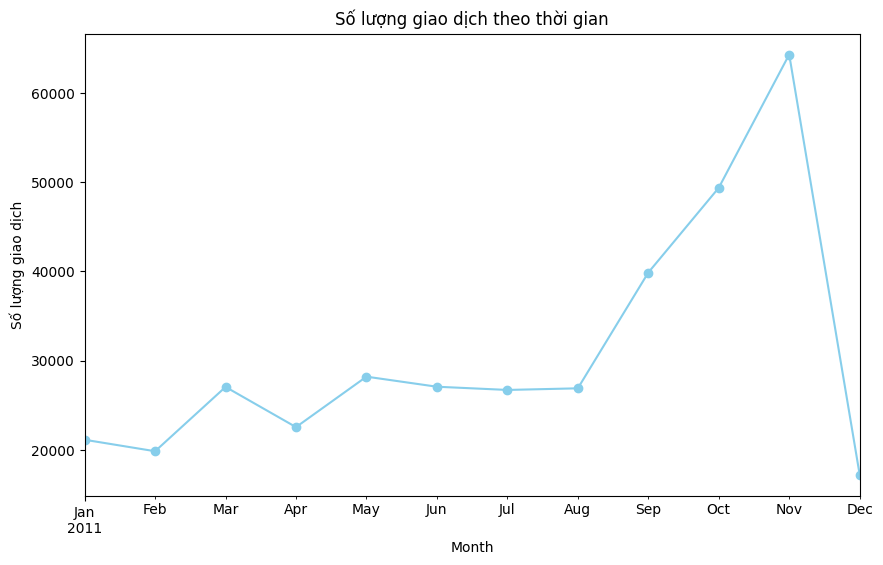

In [ ]:
# Nhóm theo tháng
df['Month'] = df['InvoiceDate'].dt.to_period('M')
orders_by_month = df.groupby('Month').size()

# Vẽ line plot
plt.figure(figsize=(10, 6))
orders_by_month.plot(kind='line', marker='o', color='skyblue')
plt.title('Số lượng giao dịch theo thời gian')
plt.xlabel('Month')
plt.ylabel('Số lượng giao dịch')
plt.xticks(rotation=0)
plt.show()

Biểu đồ **số lượng giao dịch theo thời gian** (theo tháng, từ tháng 1/2011 đến tháng 12/2011).

- Đầu năm (T1 - T4): Số giao dịch dao động nhẹ, ở mức từ khoảng 20.000 - 27.000 giao dịch. Có sự tăng nhẹ vào tháng 3, rồi giảm lại tháng 4.
- Giữa năm (T5 - T8):
  - Tháng 5 có sự tăng nhẹ (~28.000), sau đó giảm dần và ổn định quanh mức 27.000 giao dịch từ tháng 6 đến tháng 8.
- Cuối năm (T9 - T11):
  - Tăng mạnh: Từ tháng 9 bắt đầu tăng nhanh, từ khoảng 40.000 giao dịch, đến tháng 10 gần 50.000 và tháng 11 đạt đỉnh hơn 64.000 giao dịch.
  - Đây là giai đoạn có tốc độ tăng trưởng rất nhanh, có thể do nhu cầu cuối năm (ví dụ: mua sắm, lễ hội, khuyến mãi Black Friday, Giáng Sinh...).
- Tháng 12:
  - Số lượng giao dịch giảm mạnh đột ngột xuống dưới 20.000 giao dịch — thấp hơn cả đầu năm.
  - Đây là điểm bất thường cần lưu ý. Nguyên nhân có thể:
    - Dữ liệu tháng 12 chưa đầy đủ (chỉ tính một phần tháng).
    - Hoặc đúng là có sự sụt giảm do đã "bùng nổ" ở tháng 11.




#### **3.4.2. Phân bố số giao dịch theo khách hàng**

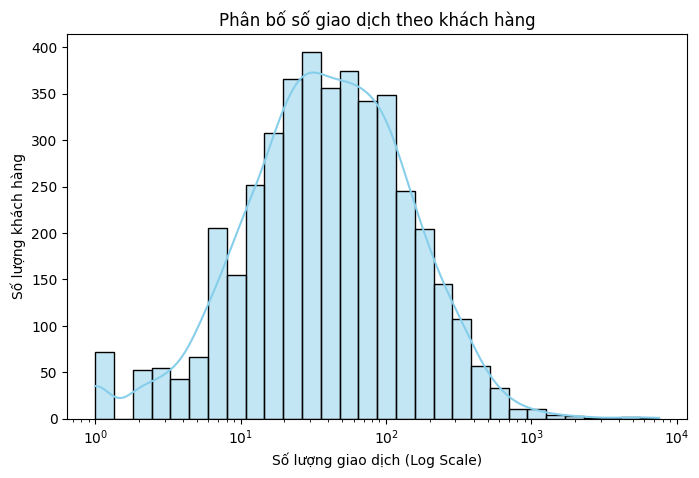

In [ ]:
# Đếm số giao dịch theo Customer ID
orders_per_customer = df['Customer ID'].value_counts()

# Vẽ histogram với log-scale
plt.figure(figsize=(8, 5))
sns.histplot(orders_per_customer, kde=True, color='skyblue', log_scale=True, bins=30)
plt.title('Phân bố số giao dịch theo khách hàng')
plt.xlabel('Số lượng giao dịch (Log Scale)')
plt.ylabel('Số lượng khách hàng')
plt.show()

Biểu đồ **phân phối số giao dịch theo khách hàng**, với trục x là **số giao dịch** (theo thang **logarithmic**) và trục y là **số lượng khách hàng** tương ứng.


**Phân tích chi tiết:**
  - Đa số khách hàng có từ khoảng 10 đến 100 giao dịch.
    - Đây là vùng cao nhất trên biểu đồ (đỉnh khoảng 30–70 giao dịch).
    - Số lượng khách hàng đạt đỉnh gần 400 người ở khoảng 30-50 giao dịch.
  - Phía bên phải:
    - Một lượng nhỏ khách hàng thực hiện hơn 1.000 giao dịch.
    - Số này giảm nhanh, cho thấy chỉ có rất ít khách hàng "cực kỳ trung thành" hoặc "hoạt động rất cao".
  - Phía bên trái:
    - Cũng có một lượng kha khá khách chỉ thực hiện rất ít giao dịch (1–10 giao dịch).




#### **3.4.3. Phân phối số lượng sản phẩm bán ra**

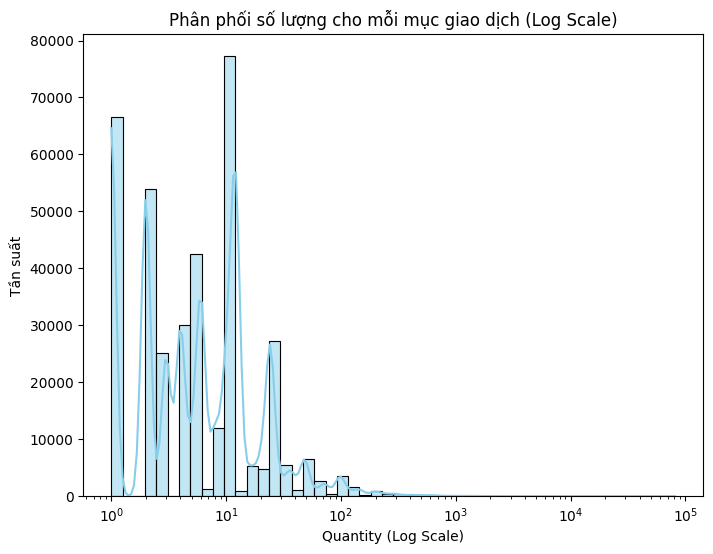

In [ ]:
# Vẽ histogram với log-scale
plt.figure(figsize=(8, 6))
sns.histplot(df['Quantity'], kde=True, color='skyblue', log_scale=True, bins=50)
plt.title('Phân phối số lượng cho mỗi mục giao dịch (Log Scale)')
plt.xlabel('Quantity (Log Scale)')
plt.ylabel('Tần suất')
plt.show()

Biểu đồ **phân phối số lượng sản phẩm mỗi món giao dịch**, với trục x là **Quantity** theo thang **log** và trục y là **tần suất** (Frequency).

- **Các điểm nổi bật:**
  - Đỉnh lớn nhất: Số lượng sản phẩm là 1 món — chiếm tỷ lệ cao nhất (~65.000 lượt).
  - Các đỉnh phụ khác:
    - Khoảng 2–3 sản phẩm, 5 sản phẩm, 10 sản phẩm và 20 sản phẩm.
    - Đây có thể là các "gói phổ biến" hoặc "mức mua quen thuộc" trong giao dịch.
  - Từ sau khoảng 100 sản phẩm trở đi:
    - Số lượng giao dịch giảm rất mạnh.
    - Vẫn có một số lượng cực kỳ nhỏ giao dịch có số lượng sản phẩm lên đến hàng nghìn.







#### **3.4.4. Mối quan hệ giữa giá trị đơn hàng và giá sản phẩm**

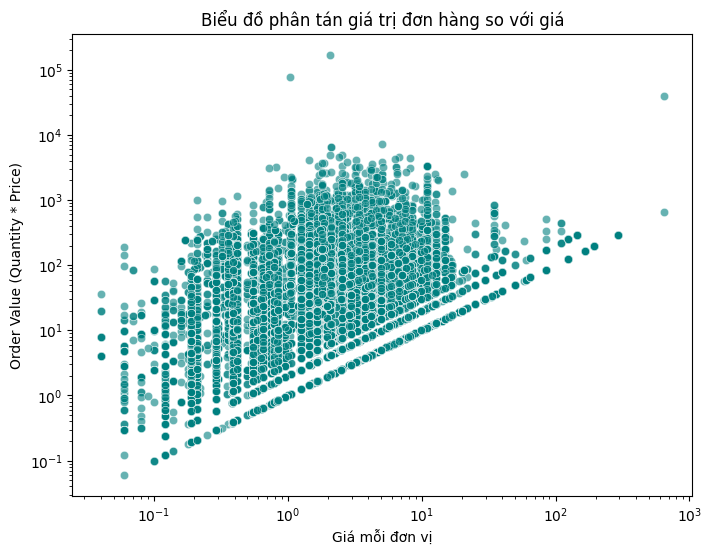

In [ ]:
# Vẽ scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='OrderValue', data=df, alpha=0.6, color='teal')
plt.title('Biểu đồ phân tán giá trị đơn hàng so với giá')
plt.xlabel('Giá mỗi đơn vị')
plt.ylabel('Order Value (Quantity * Price)')
plt.xscale('log')  # Log-scale cho Price
plt.yscale('log')  # Log-scale cho OrderValue
plt.show()

**Biểu đồ phân tán (scatter plot)** thể hiện mối quan hệ giữa:
- Trục X: Giá mỗi đơn vị sản phẩm (Unit Price, theo thang log).
- Trục Y: Giá trị đơn hàng (Order Value = Quantity × Unit Price, cũng theo thang log).


**Phân tích chi tiết:**
- Ý nghĩa xu hướng:
  - Khi giá mỗi đơn vị tăng, giá trị đơn hàng trung bình cũng tăng, nhưng không tuyến tính.
  - Các đơn hàng giá trị lớn có thể đến từ:
    - Đơn vị giá cao (sản phẩm đắt tiền) với số lượng vừa phải.
    - Hoặc sản phẩm giá thấp nhưng số lượng mua rất nhiều.
  - Đường xiên chéo phía dưới (các điểm xếp thành đường thẳng dọc theo cạnh dưới) đại diện cho những giao dịch với Quantity = 1:
    - Giá trị đơn hàng ≈ Giá mỗi đơn vị.

- **Các cụm dữ liệu:**
  - Tập trung nhiều nhất ở khoảng:
    - Giá đơn vị: từ 0.1 đến 10.
    - Giá trị đơn hàng: từ 1 đến 1000.
  - Ít giao dịch có giá trị cực cao (Order Value > 10,000).
  - Xuất hiện một số outlier (các điểm xa vùng tập trung), có thể là giao dịch cực lớn hoặc dữ liệu bất thường.








#### **3.4.5. Tương quan giữa các yếu tố Quantity, Price, OrderValue**

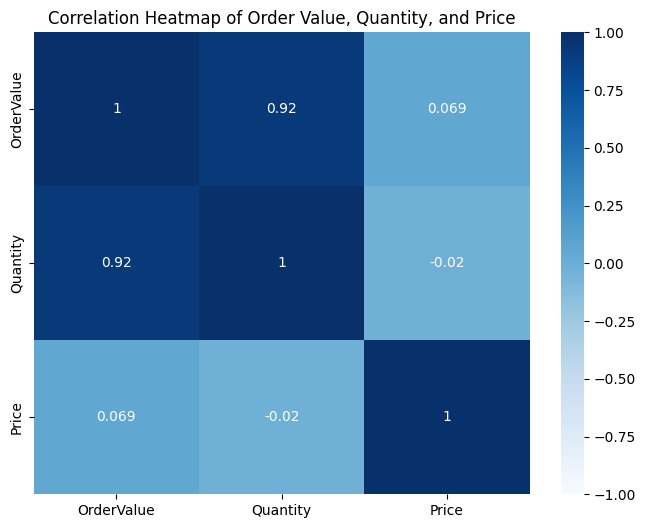

In [ ]:
# Chọn các cột số để tính tương quan
numeric_cols = ['OrderValue', 'Quantity', 'Price']
correlation_matrix = df[numeric_cols].corr()

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Order Value, Quantity, and Price')
plt.show()


**Tóm tắt hệ số tương quan:**

| Cặp biến | Hệ số tương quan (r) | Giải thích |
|----------|------------------------|------------|
| `Quantity` & `OderValue` | **≈ 0.92** | **Tương quan dương mạnh**: Số lượng sản phẩm tăng → tổng tiền thường tăng. |
| `Price` & `OderValue` | **≈ 0.0090** | **Tương quan dương yếu **: Đơn giá cao góp phần tăng tổng tiền, nhưng yếu hơn số lượng. |
| `Quantity` & `Price` | **≈  -0.20** | **Tương quan âm yếu**: Có thể đơn giá cao thì người ta mua ít (ngược lại), nhưng mối quan hệ này không mạnh. |

**Nhận định:**
- **OderValue** phụ thuộc mạnh hơn vào **Quantity** (số lượng) hơn là **Price** (giá đơn vị).
- Mối quan hệ giữa giá và số lượng không rõ ràng cho thấy có thể do sự đa dạng sản phẩm và hành vi người mua khác nhau.





### **3.5. Tính toán đặc trưng RFM**

#### **3.5.1. Tính RFM**


**Mục đích**
- RFM (Recency, Frequency, Monetary) là phương pháp phân tích hành vi khách hàng, đánh giá:
- Recency: Mức độ gần đây của lần mua cuối (khách mua gần đây thường có giá trị cao hơn).
- Frequency: Tần suất mua sắm (khách mua thường xuyên là trung thành).
- Monetary: Tổng giá trị chi tiêu (khách chi tiêu nhiều là ưu tiên).

**Cách thực hiện**
- Recency:
  - Công thức: Số ngày từ lần mua cuối (InvoiceDate lớn nhất) của mỗi khách hàng đến ngày tham chiếu (thường là ngày cuối trong dữ liệu + 1 ngày).
  - Cách tính: Nhóm theo Customer ID, lấy max(InvoiceDate), trừ cho ngày tham chiếu.

- Frequency:
  - Công thức: Số hóa đơn duy nhất (Invoice) của mỗi khách hàng.
  - Cách tính: Nhóm theo Customer ID, đếm số Invoice duy nhất (nunique).
- Monetary:
  - Công thức: Tổng của cột OderValue
  - Cách tính: thêm cột OderValue , nhóm theo Customer ID, tính tổng.

In [ ]:
# Ngày hiện tại (ngày cuối cùng trong dữ liệu + 1 ngày)
current_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,  # Recency
    'Invoice': 'nunique',  # Frequency (số hóa đơn duy nhất)
    'OrderValue': 'sum'  # Monetary (tổng OrderValue)
}).rename(columns={
    'InvoiceDate': 'Recency',
    'Invoice': 'Frequency',
    'OrderValue': 'Monetary'
}).reset_index()

Chuyển các giá trị RFM thành điểm rời rạc(1-5) để phân khúc khách hàng
Chia dữ liệu thành:
- Recency:Gía trị thấp( mua gần đây) -> điểm cao(5),giá trị thấp(mua cách đây lâu) -> điểm thấp (1)
- Frequency: Gía trị cao( mua thường xuyên) -> điểm cao (5),ngược lại
- Monetary: chi tiêu nhiều -> điểm cao(5), chi tiêu thấp (1)

In [ ]:
# Xem kết quả
print(rfm.head())

  Customer ID  Recency  Frequency  Monetary
0       12346      326          1  77183.60
1       12347        2          6   3598.21
2       12348       75          3    784.44
3       12349       19          1   1457.55
4       12350      310          1    294.40


#### **3.5.2. Chuẩn hóa dữ liệu**

In [ ]:
# Xử lý ngoại lệ và chuẩn hóa RFM
rfm['Monetary'] = np.log1p(rfm['Monetary'])
rfm['Frequency'] = np.log1p(rfm['Frequency'])


scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
rfm_scaled = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])
print("Thống kê RFM sau chuẩn hóa:")
print(rfm_scaled.describe())


Thống kê RFM sau chuẩn hóa:
            Recency     Frequency      Monetary
count  4.214000e+03  4.214000e+03  4.214000e+03
mean  -4.552599e-17  9.273814e-17 -5.193336e-16
std    1.000119e+00  1.000119e+00  1.000119e+00
min   -9.305694e-01 -9.405407e-01 -4.012506e+00
25%   -7.531652e-01 -9.405407e-01 -6.752114e-01
50%   -4.094446e-01 -3.298067e-01 -5.015485e-02
75%    4.775762e-01  4.396270e-01  6.569377e-01
max    2.828181e+00  5.886711e+00  4.779892e+00


### **3.6. Xây dựng và Đánh giá mô hình sử dụng K-Means**

Áp dụng KMeans (hoặc thuật toán phân cụm khác)

Xác định số cụm bằng phương pháp Elbow hoặc Silhouette

Gán nhãn cụm cho khách hàng



Trong phương pháp Elbow:
- Chạy K-Means với nhiều giá trị
𝑘 khác nhau và tính toán WCSS (Within-Cluster Sum of Squares) – tổng bình phương khoảng cách từ mỗi điểm đến tâm cụm của nó.
- Vẽ đồ thị biểu diễn WCSS theo từng giá trị
𝑘Khi số cụm tăng, WCSS sẽ giảm, nhưng sau một điểm nhất định, mức độ cải thiện sẽ giảm dần.

- Điểm gấp khúc (hay còn gọi là “khuỷu tay”) trên đồ thị chính là nơi thích hợp để chọn
𝑘
k


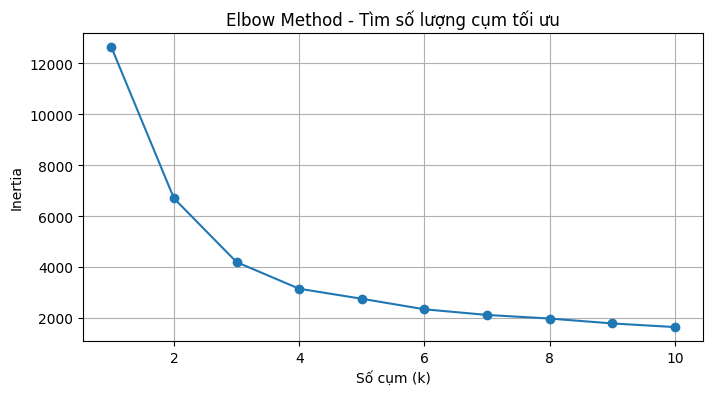

In [ ]:
# Elbow method để chọn số lượng cụm tối ưu
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method - Tìm số lượng cụm tối ưu')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


- Giá trị Inertia (WCSS) giảm nhanh khi số cụm 𝑘 tăng từ 1 đến 4.
- Sau 𝑘=3, đường cong bắt đầu "thoải" hơn, mức giảm không còn đáng kể.
- Do đó, điểm gấp khúc rõ ràng (elbow) nằm tại 𝑘=3. Đây là vị trí cân bằng giữa việc giảm WCSS và số lượng cụm, giúp phân cụm hiệu quả mà không gây dư thừa.



Silhouette Score là chỉ số đánh giá chất lượng phân cụm của thuật toán như K-Means, bằng cách đo lường:

- **Mức độ gắn kết** giữa một điểm và các điểm trong cùng cụm (gọi là $a(i)$),
- **Mức độ tách biệt** giữa điểm đó và các cụm khác (gọi là $b(i)$).

Công thức:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Giá trị Silhouette Score

- **Gần 1** → điểm được phân cụm tốt.
- **Gần 0** → điểm nằm ở ranh giới giữa các cụm.
- **Nhỏ hơn 0** → điểm có thể bị phân vào sai cụm.

Áp dụng trong K-Means

1. Sau khi chạy K-Means với số cụm $k$, tính Silhouette Score để đánh giá mức độ hiệu quả của việc phân cụm.
2. So sánh Silhouette Score cho các giá trị $k$ khác nhau → chọn $k$ có điểm trung bình cao nhất → xác định số cụm tối ưu.

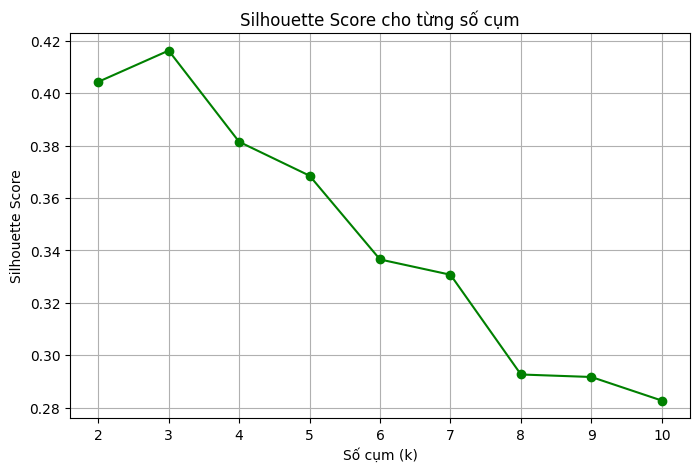

In [ ]:
silhouette_scores = []

for k in range(2, 11):  # bắt đầu từ 2 cụm
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    score = silhouette_score(rfm_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Vẽ biểu đồ Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.xlabel('Số cụm (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score cho từng số cụm')
plt.grid(True)
plt.show()

- Điểm Silhouette Score cao nhất tại k=3 và, cho thấy các điểm dữ liệu trong cùng một cụm có độ tương đồng cao và khác biệt rõ rệt so với các cụm khác.
- Kết hợp với chọn cụm tối ưu trong phương pháp Elbow thì cụm tối ưu được chọn k=3

In [ ]:
# Khởi tạo mô hình K-Means với k=3
kmeans = KMeans(
    n_clusters=3,
    init='k-means++',  # Khởi tạo thông minh
    random_state=42,
    n_init=10
)

# Huấn luyện mô hình trên dữ liệu đã chuẩn hóa (ví dụ: rfm_scaled)
kmeans.fit(rfm_scaled)

# Gán nhãn cụm cho từng điểm dữ liệu
labels = kmeans.labels_

# Thêm nhãn cụm vào DataFrame gốc
rfm['Cluster'] = labels

In [ ]:
silhouette_avg = silhouette_score(rfm_scaled, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")
db_score = davies_bouldin_score(rfm_scaled, labels)
print(f"Davies-Bouldin Index: {db_score:.2f}")
ch_score = calinski_harabasz_score(rfm_scaled, labels)
print(f"Calinski-Harabasz Index: {ch_score:.2f}")

Silhouette Score: 0.42
Davies-Bouldin Index: 0.83
Calinski-Harabasz Index: 4230.78


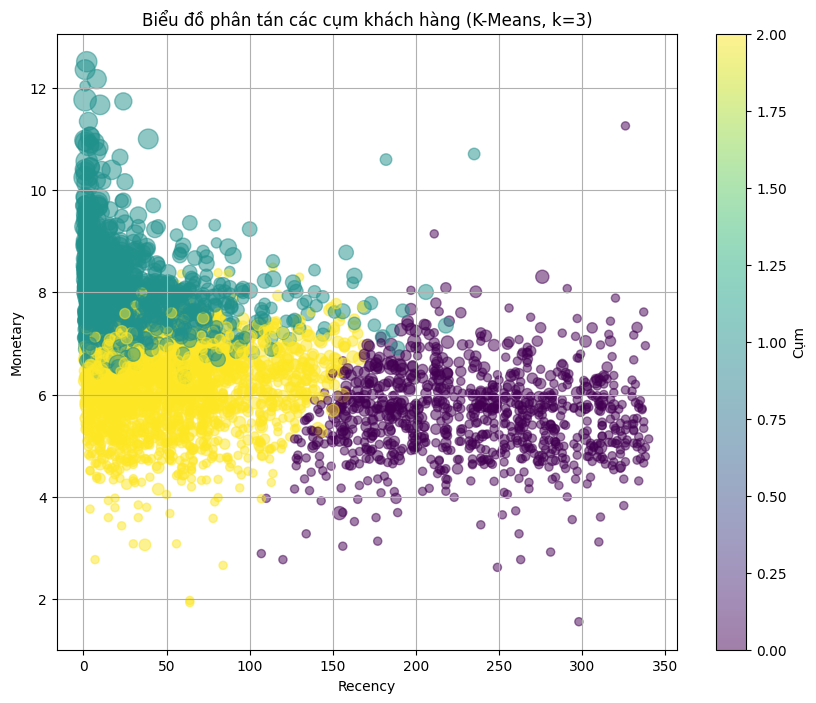

In [ ]:
# Trực quan hóa cụm
plt.figure(figsize=(10, 8))
scatter = plt.scatter(rfm['Recency'],
                      rfm['Monetary'],
                      c=rfm['Cluster'],        # Màu sắc theo cụm
                      cmap='viridis',          # Bảng màu
                      s=rfm['Frequency']*50,   # Kích thước điểm theo Frequency (nhân 50 để dễ nhìn)
                      alpha=0.5)               # Độ trong suốt

# Thêm nhãn và tiêu đề
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Biểu đồ phân tán các cụm khách hàng (K-Means, k=3)')

# Thêm thanh màu (colorbar) để giải thích cụm
plt.colorbar(scatter, label='Cụm')

# Thêm lưới
plt.grid(True)

# Hiển thị biểu đồ
plt.show()


**Phân tích các cụm (clusters)**

Có 3 cụm màu sắc (mỗi cụm đại diện một nhóm khách hàng):

**Cụm 1 (màu xanh ngọc, Recency thấp, Monetary cao)**:

* Đây là nhóm **khách hàng tốt nhất**:

  * Giao dịch **gần đây** (Recency thấp),
  * Có giá trị giao dịch **cao**.
  * Có thể là nhóm **trung thành, chi tiêu cao** → nên giữ chân bằng các chương trình ưu đãi.

**Cụm 2 (màu vàng, Recency vừa, Monetary trung bình)**:

* Nhóm khách hàng **tầm trung**:

  * Giao dịch không quá gần đây, giá trị chi tiêu ở mức trung bình.
  * Có thể đang có dấu hiệu **rời bỏ**, cần chăm sóc thêm để giữ lại.

**Cụm 3 (màu tím, Recency cao, Monetary thấp)**:

* Nhóm **khách hàng kém tiềm năng**:

  * Đã lâu không giao dịch (Recency cao), chi tiêu thấp.
  * Có thể đã ngừng sử dụng dịch vụ → ít nên đầu tư nhiều vào nhóm này.






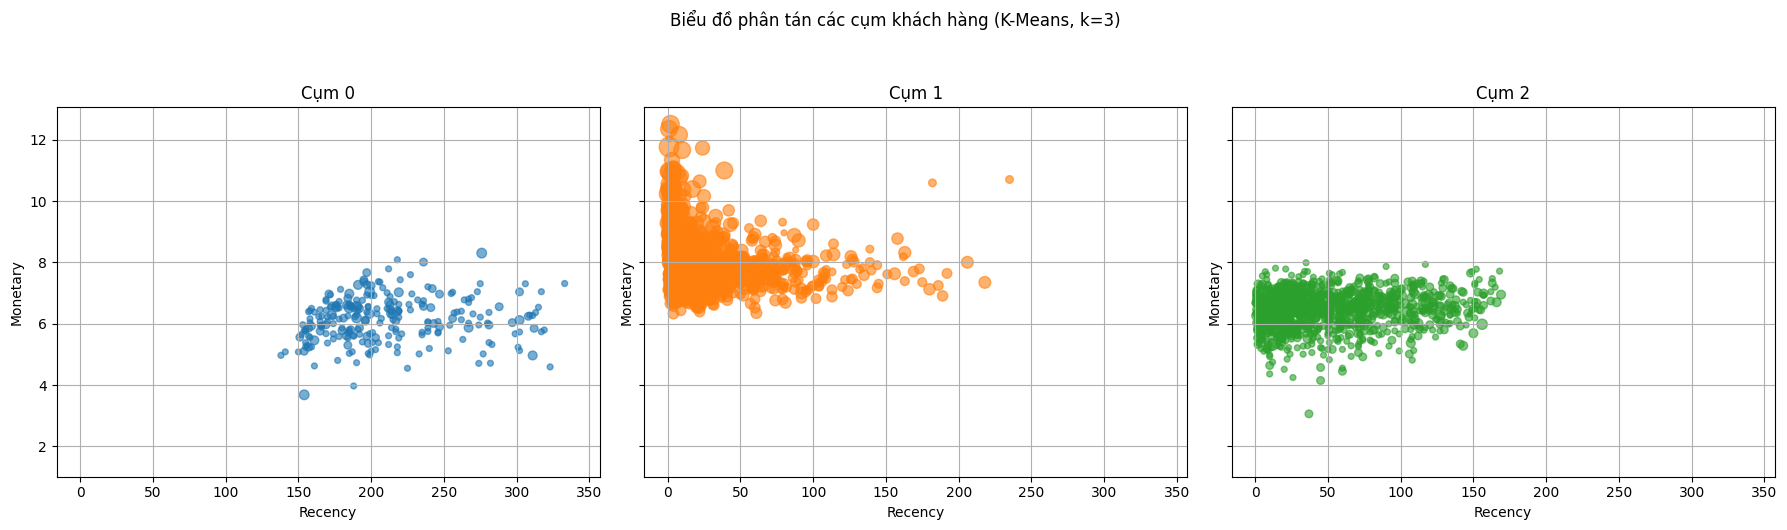

In [ ]:
# Tạo figure với 3 subplot cho 3 cụm
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)

# Chuẩn hóa Frequency để kích thước điểm hợp lý
frequency_scaled = (rfm['Frequency'] - rfm['Frequency'].min()) / (rfm['Frequency'].max() - rfm['Frequency'].min())

# Vẽ scatter plot cho từng cụm
for i, cluster in enumerate(rfm['Cluster'].unique()):
    cluster_data = rfm[rfm['Cluster'] == cluster]
    axes[i].scatter(cluster_data['Recency'],
                    cluster_data['Monetary'],
                    s=frequency_scaled[rfm['Cluster'] == cluster]*200,
                    c=[f'C{i}'],
                    alpha=0.6)
    axes[i].set_title(f'Cụm {cluster}')
    axes[i].set_xlabel('Recency')
    axes[i].set_ylabel('Monetary')
    axes[i].grid(True)

plt.suptitle('Biểu đồ phân tán các cụm khách hàng (K-Means, k=3)', y=1.05)
plt.tight_layout()
plt.show()

Biểu đồ trình bày chi tiết **3 cụm khách hàng** sau khi phân cụm bằng K-Means (k=3), theo hai chiều:

* **Recency (R)** – số ngày kể từ lần huỷ gần nhất.
* **Monetary (M)** – tổng giá trị huỷ (có thể là chi tiêu nếu đây là hệ thống thương mại).

Kích thước điểm có thể biểu diễn cho **Frequency** – tần suất giao dịch/hủy.

---

 **Cụm 0** (bên trái):

* **Recency cao** (dao động quanh 150–300 ngày): khách hàng đã **lâu không quay lại**.
* **Monetary trung bình (4–8)**: từng có **mức chi tiêu/hủy trung bình**.
* **Frequency thấp đến trung bình** (bong bóng vừa).
*  **Nhóm này có thể là khách hàng đã bỏ đi** hoặc rất lâu không tương tác, ít tiềm năng.

---

 **Cụm 1** (ở giữa):

* **Recency thấp** (gần đây): nhiều điểm tập trung ở 0–50 ngày.
* **Monetary trải dài** từ thấp đến rất cao (4–12).
* **Frequency khá cao** (nhiều bong bóng lớn).
*  Đây là **nhóm khách hàng giá trị cao và trung thành**: mới giao dịch gần đây, tiêu nhiều, có thể là **VIP**. Nên chăm sóc kỹ, giữ chân bằng khuyến mãi hoặc chương trình thân thiết.

---
 **Cụm 2** (bên phải):

* **Recency trung bình đến thấp** (nằm trong khoảng 0–150): nghĩa là **khá nhiều khách quay lại gần đây**.
* **Monetary thấp đến trung bình** (dao động quanh 5–7).
* **Frequency nhỏ hơn cụm 1** (bong bóng nhỏ hơn).
*  Nhóm này là **khách hàng phổ thông**: thường xuyên quay lại nhưng chi tiêu không quá cao. Nên thúc đẩy họ mua nhiều hơn thông qua upsell hoặc bundle sản phẩm.





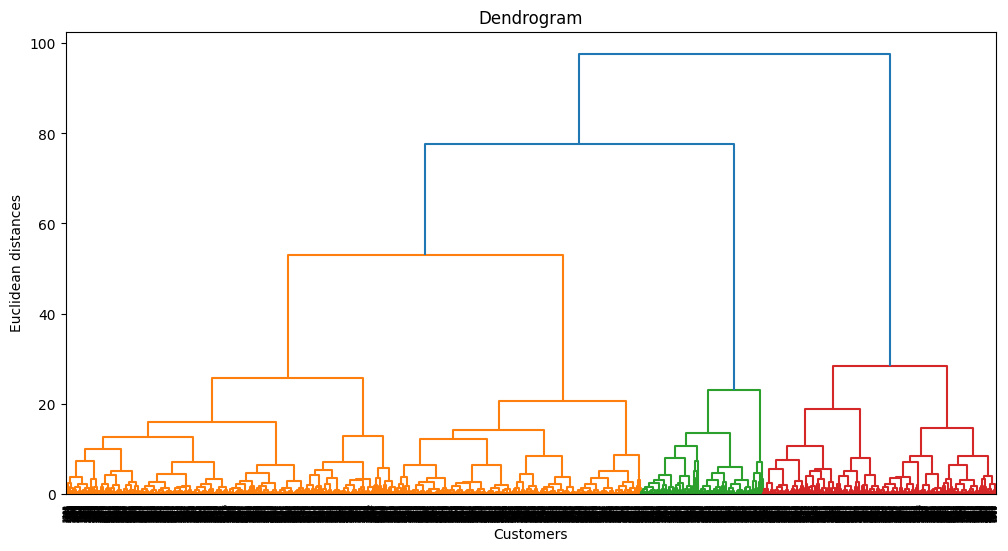

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
# Vẽ dendrogram để xác định số cụm
plt.figure(figsize=(12, 6))
linked = linkage(rfm_scaled, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()



Một trong những mục đích chính của dendrogram là giúp **chọn số cụm phù hợp** (số lượng nhóm khách hàng hợp lý nhất):

**Cách chọn số cụm bằng phương pháp "ngưỡng cắt" (threshold):**

* Tìm **đoạn dài nhất theo chiều dọc (khoảng cách lớn)** mà **không bị cắt ngang bởi đường ngang** nào khác.
* Vẽ một đường ngang cắt qua vùng đó → đếm **số đoạn giao nhau** với các nhánh chính ⇒ **số cụm hợp lý**.

**Trong biểu đồ**:

* Nếu vẽ một đường ngang tại khoảng **khoảng cách \~75**, sẽ cắt qua **3 nhánh chính**.
* Điều này xác nhận rằng việc chọn **k = 3 cụm trong K-Means là hợp lý**, vì dendrogram cũng chỉ ra điều tương tự.






### **3.7. Phân tích hành vi của các cụm khách hàng**

Mô tả đặc trưng từng cụm (RFM trung bình)

Trực quan hóa phân cụm (scatterplot, PCA)

Đặt tên cụm và đưa ra chiến lược marketing tương ứng



In [ ]:
# Merge nhãn cụm vào bảng gốc
cancelled_orders_rfm = df.merge(rfm[['Customer ID', 'Cluster']], on="Customer ID", how="left")

# Phân tích đặc điểm từng cụm
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max'],
    'Customer ID': 'count'
}).round(2)

cluster_summary.columns = [
    'Recency_Mean', 'Recency_Min', 'Recency_Max',
    'Frequency_Mean', 'Frequency_Min', 'Frequency_Max',
    'Monetary_Mean', 'Monetary_Min', 'Monetary_Max',
    'Count'
]

print("Tóm tắt đặc điểm các cụm:")
print(cluster_summary)

Tóm tắt đặc điểm các cụm:
         Recency_Mean  Recency_Min  Recency_Max  Frequency_Mean  \
Cluster                                                           
0              233.71          107          340            0.82   
1               28.15            1          235            2.12   
2               51.56            1          169            1.03   

         Frequency_Min  Frequency_Max  Monetary_Mean  Monetary_Min  \
Cluster                                                              
0                 0.69           1.95           5.60          1.56   
1                 1.10           5.23           7.93          6.33   
2                 0.69           2.08           6.12          1.93   

         Monetary_Max  Count  
Cluster                       
0               11.25    937  
1               12.51   1284  
2                8.73   1993  


- Cụm 0 có Recency rất cao (trung bình ~233 ngày, nghĩa là phần lớn khách hàng đã lâu chưa mua), tần suất mua rất thấp (0,82 lần) và giá trị chi tiêu trung bình thấp nhất (5,60).
 + Nhóm này gồm những khách hàng hiếm khi mua hàng và có thể đã mất dần sự quan tâm đến thương hiệu.Đây có thể xem là nhóm "Ngủ đông": họ “hiếm khi mua hàng, tần suất thấp và giá trị chi tiêu không đáng kể”
 + Nhóm này thường có nguy cơ chuyển sang không còn mua nữa nếu không được chú ý kịp thời.
- Cụm 1 có Recency rất thấp (trung bình 28 ngày), tần suất cao (2,12 lần) và giá trị chi tiêu lớn nhất (7,93). Điều này cho thấy nhóm này thường xuyên mua sắm và chi tiêu nhiều.
 + Có thể xem là nhóm “Khách hàng trung thành VIP”: họ mua hàng đều đặn, chi tiêu cao và có giao dịch gần đây nhất
 + Nhóm này là tài sản quan trọng của doanh nghiệp, cần được duy trì và nuôi dưỡng lâu dài.
- Cụm 2 có Recency trung bình khoảng 51 ngày, tần suất mua ~1,03 lần và giá trị chi tiêu trung bình 6,12. Nhóm này mua sắm ở mức trung bình – không quá thường xuyên nhưng cũng không quá lâu mới mua (có thể gồm khách mới hoặc khách mua lẻ tẻ).
  + Được phân loại là nhóm “Khách hàng có tiềm năng trung thành": họ mới mua gần đây nhưng tần suất chưa cao, chi tiêu ở mức trung bình và có khả năng tăng thêm trong tương lai
 + Nói cách khác, đây là khách hàng cần được nuôi dưỡng và khuyến khích tiếp tục mua để trở thành khách trung thành.

**In ra số lượng khách hàng của từng cụm**

In [ ]:

rfm['Cluster'] = rfm['Cluster'].astype(int)  # đảm bảo kiểu số nguyên

# Tóm tắt thông tin trung bình RFM và số lượng khách hàng mỗi cụm
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Customer ID': 'count'  # Thay 'CustomerID' bằng 'Customer ID'
}).rename(columns={'Customer ID': 'Số lượng khách hàng'})  # Thay 'CustomerID' bằng 'Customer ID'

display(cluster_summary)

,Recency,Frequency,Monetary,Số lượng khách hàng
Cluster,,,,
0,233.705443,0.824056,5.601882,937
1,28.154206,2.116725,7.933476,1284
2,51.556949,1.034734,6.115748,1993


**Biểu diễn biểu đồ trên các cụm**

**Tính CLV của mỗi cụm**
- CLV (Customer Lifetime Value) – hay Giá trị vòng đời khách hàng – là tổng lợi nhuận mà một khách hàng mang lại cho doanh nghiệp trong suốt thời gian họ mua sắm.
-Vai trò của CLV đối với doanh nghiệp:
 + Giúp xác định khách hàng nào nên được ưu tiên chăm sóc.
 + Hỗ trợ ra quyết định về marketing, giữ chân khách hàng, và phân bổ ngân sách.
 + Xác định được ai là "VIP", ai là "tiềm năng", ai là "ngủ đông".
- Công thức tính CLV:
 CLV = Giá trị trung bình mỗi lần mua × Tần suất mua hàng × Thời gian trung bình khách hàng gắn bó
- Trường hợp đã chuẩn hóa:
CLV = Frequency * Monetary



<ipython-input-40-f7f0e3b3d5ff>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clv_avg.index, y=clv_avg.values, palette="viridis")


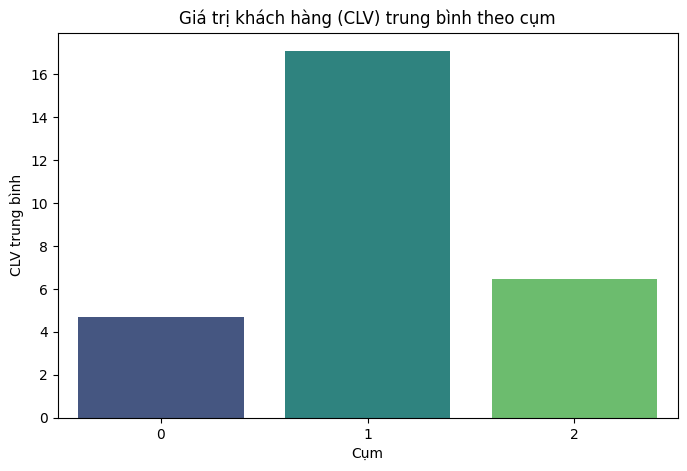

In [ ]:
# Ước lượng CLV (Customer Lifetime Value)
rfm['CLV'] = rfm['Frequency'] * rfm['Monetary']

# Trung bình CLV theo cụm
clv_avg = rfm.groupby('Cluster')['CLV'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=clv_avg.index, y=clv_avg.values, palette="viridis")
plt.title("Giá trị khách hàng (CLV) trung bình theo cụm")
plt.xlabel("Cụm")
plt.ylabel("CLV trung bình")
plt.show()


- Cụm 1 có CLV trung bình cao nhất, vượt xa các cụm còn lại, cho thấy đây là nhóm khách hàng có giá trị lớn nhất và tiềm năng sinh lợi cao, dù số lượng giao dịch có thể không nhiều nhưng giá trị mỗi lần giao dịch rất lớn và đều đặn.

- Cụm 2 có CLV trung bình ở mức khá, phản ánh nhóm này có tiềm năng tăng trưởng, đặc biệt vào các giai đoạn cao điểm trong năm – nếu được thúc đẩy đúng cách, nhóm này có thể trở thành nguồn sinh lợi quan trọng.

- Cụm 0 là nhóm có CLV trung bình thấp nhất, có thể là những khách hàng chỉ mua sắm nhỏ lẻ, không thường xuyên hoặc có hành vi giao dịch thiếu ổn định – cần được cân nhắc kỹ trong chiến lược duy trì hoặc loại bỏ.

In [ ]:
def label_customer(cluster):
    if cluster == 0:
        return "Khách tiềm năng"
    elif cluster == 1:
        return "Trung thành"
    elif cluster == 2:
        return "Ngủ quên"
    else:
        return "Khác"

rfm['Nhóm khách hàng'] = rfm['Cluster'].apply(label_customer)
rfm[['Customer ID', 'Cluster', 'Nhóm khách hàng']].head()


,Customer ID,Cluster,Nhóm khách hàng
0,12346,0,Khách tiềm năng
1,12347,1,Trung thành
2,12348,2,Ngủ quên
3,12349,2,Ngủ quên
4,12350,0,Khách tiềm năng


In [ ]:
# Chuyển đổi InvoiceDate thành datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Thêm các cột hỗ trợ phân tích thời gian
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Giờ'] = df['InvoiceDate'].dt.hour # Sửa thành 'Giờ'
df['Tháng'] = df['InvoiceDate'].dt.month_name() # Sửa thành 'Tháng'


# Merge the 'Cluster' column from rfm to df based on 'Customer ID'
df = pd.merge(df, rfm[['Customer ID', 'Cluster']], on='Customer ID', how='left')

In [ ]:

# Hàm phân tích thời gian mua sắm
def analyze_time_behavior(df, cluster_label):
    # Now use 'Cluster' instead of 'Cluster_x' to filter
    # Use the correct column name after the merge, considering potential suffixes
    cluster_data = df[df['Cluster'] == cluster_label]

    print(f"\n=== Phân tích thời gian mua sắm cho Cluster {cluster_label} ===")

    # 1. Ngày trong tuần
    print("\nPhân bố ngày trong tuần:")
    day_distribution = cluster_data['DayOfWeek'].value_counts(normalize=True)
    print(day_distribution)

    # Trực quan hóa
    plt.figure(figsize=(8, 4))
    day_distribution.plot(kind='bar', color='skyblue')
    plt.title(f'Phân phối ngày trong tuần cho cụm {cluster_label}')
    plt.xlabel('Ngày trong tuần')
    plt.ylabel('Tỉ lệ')
    plt.xticks(rotation=45)
    plt.show()

    # 2. Giờ trong ngày
    print("\nPhân bố giờ trong ngày (top 5):")
    # Use the correct column name 'Giờ' (or potentially 'Giờ_rfm' depending on suffixes)
    hour_distribution = cluster_data['Giờ'].value_counts(normalize=True).head()
    print(hour_distribution)

    # Trực quan hóa
    plt.figure(figsize=(8, 4))
    hour_distribution.plot(kind='bar', color='lightgreen')
    plt.title(f'Phân phối giờ trong ngày cho cụm {cluster_label}')
    plt.xlabel('Giờ trong ngày')
    plt.ylabel('Tỉ lệ')
    plt.xticks(rotation=45)
    plt.show()

    # 3. Tháng trong năm
    print("\nPhân bố tháng trong năm:")
    # Use the correct column name 'Tháng' (or potentially 'Tháng_rfm' depending on suffixes)
    month_distribution = cluster_data['Tháng'].value_counts(normalize=True)
    print(month_distribution)

    # Trực quan hóa
    plt.figure(figsize=(8, 4))
    month_distribution.plot(kind='bar', color='salmon')
    plt.title(f'Phân phối tháng trong năm cho cụm {cluster_label}')
    plt.xlabel('Tháng')
    plt.xticks(rotation=45)
    plt.ylabel('Tỉ lệ')
    plt.show()


=== Phân tích thời gian mua sắm cho Cluster 0 ===

Phân bố ngày trong tuần:
DayOfWeek
Thursday     0.222798
Wednesday    0.171892
Tuesday      0.162327
Friday       0.151876
Monday       0.147536
Sunday       0.143570
Name: proportion, dtype: float64


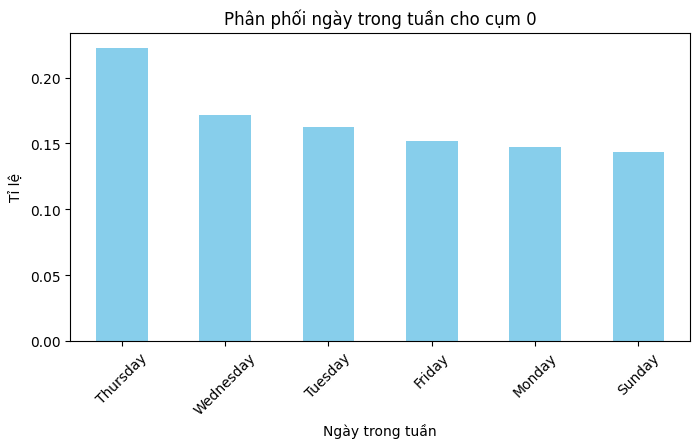


Phân bố giờ trong ngày (top 5):
Giờ
12    0.168113
13    0.158408
14    0.142591
15    0.115435
11    0.098171
Name: proportion, dtype: float64


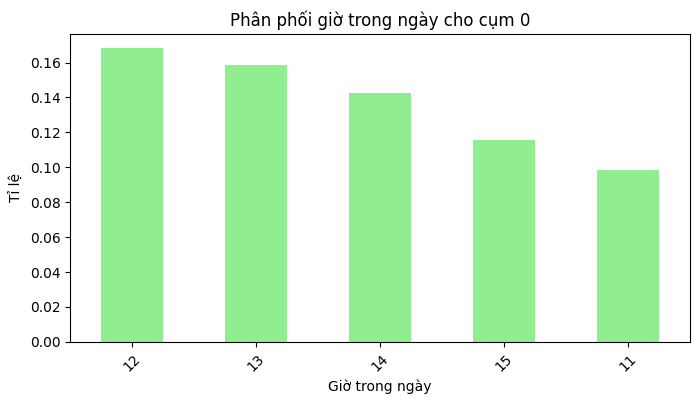


Phân bố tháng trong năm:
Tháng
March       0.178611
January     0.162747
April       0.151549
May         0.151129
February    0.141564
June        0.131299
July        0.078014
August      0.005086
Name: proportion, dtype: float64


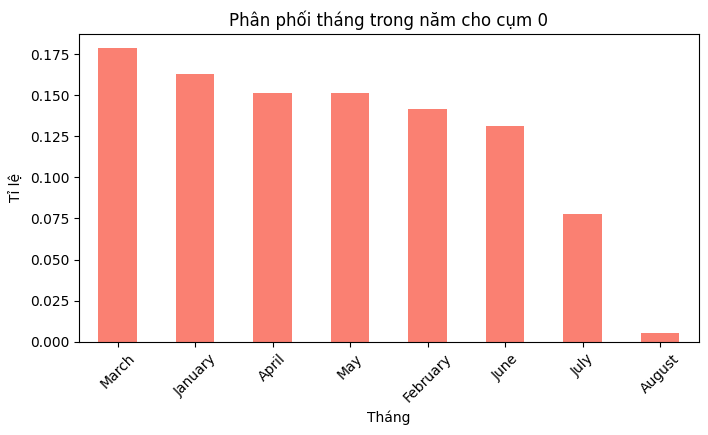

In [ ]:
analyze_time_behavior(df,0)

- Cụm 0 - Khách hàng ngủ đông có giao dịch tập trung vào giữa tuần, đặc biệt là Thứ Năm, và vào khoảng giờ 12h-15h. Giao dịch chủ yếu diễn ra vào đầu năm (Tháng 1-5), với đỉnh ở Tháng 3, và giảm mạnh vào giữa và cuối năm, đặc biệt gần như không có giao dịch vào Tháng 8. Điều này chứng tỏ nhóm này có xu hướng giao dịch không đều, với hoạt động giảm dần về cuối năm.


=== Phân tích thời gian mua sắm cho Cluster 1 ===

Phân bố ngày trong tuần:
DayOfWeek
Thursday     0.200404
Wednesday    0.174960
Tuesday      0.173576
Monday       0.165768
Sunday       0.145524
Friday       0.139768
Name: proportion, dtype: float64


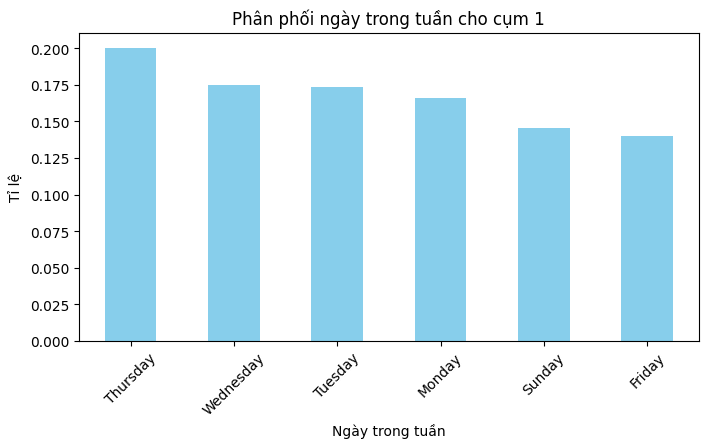


Phân bố giờ trong ngày (top 5):
Giờ
12    0.185506
13    0.157511
14    0.128719
11    0.128105
15    0.116186
Name: proportion, dtype: float64


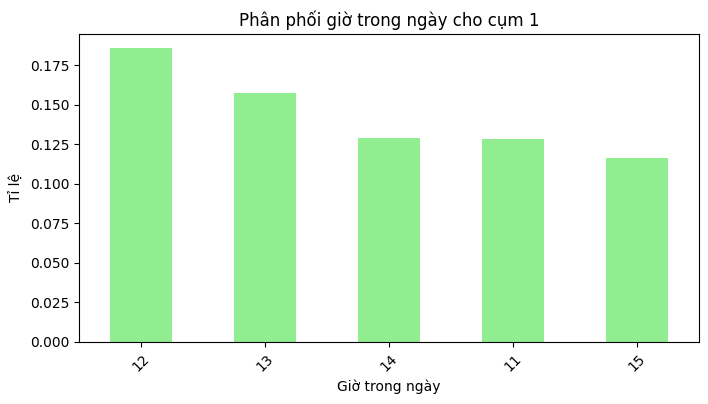


Phân bố tháng trong năm:
Tháng
November     0.158251
October      0.123223
September    0.109661
May          0.081772
June         0.077859
August       0.077444
July         0.074961
March        0.074095
April        0.061593
January      0.058831
February     0.054441
December     0.047870
Name: proportion, dtype: float64


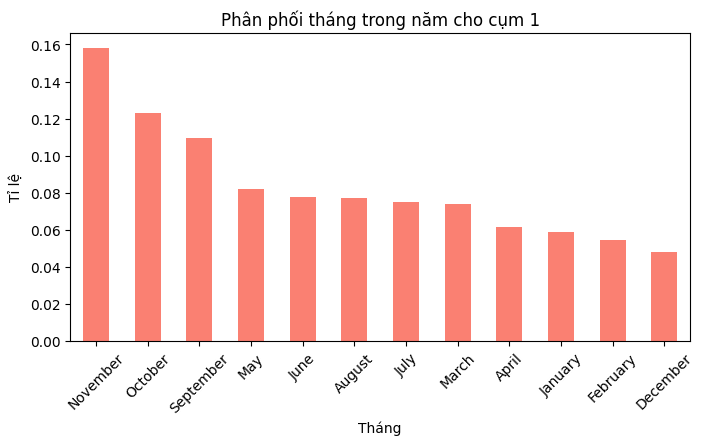

In [ ]:
analyze_time_behavior(df,1)

- Cụm 1 - Khách hàng VIP trung thành có giao dịch tập trung vào giữa tuần, đặc biệt là Thứ Năm, và vào khoảng giờ 12h-15h, tương tự Cụm 0. Tuy nhiên, giao dịch tăng mạnh vào cuối năm, với đỉnh ở Tháng 11, và giảm mạnh vào Tháng 12. Điều này chứng tỏ nhóm này có xu hướng giao dịch đều đặn qua các ngày trong tuần, nhưng có sự gia tăng rõ rệt vào các tháng cuối năm, đặc biệt là Tháng 11.


=== Phân tích thời gian mua sắm cho Cluster 2 ===

Phân bố ngày trong tuần:
DayOfWeek
Sunday       0.193750
Thursday     0.192088
Tuesday      0.162882
Monday       0.161185
Wednesday    0.157827
Friday       0.132267
Name: proportion, dtype: float64


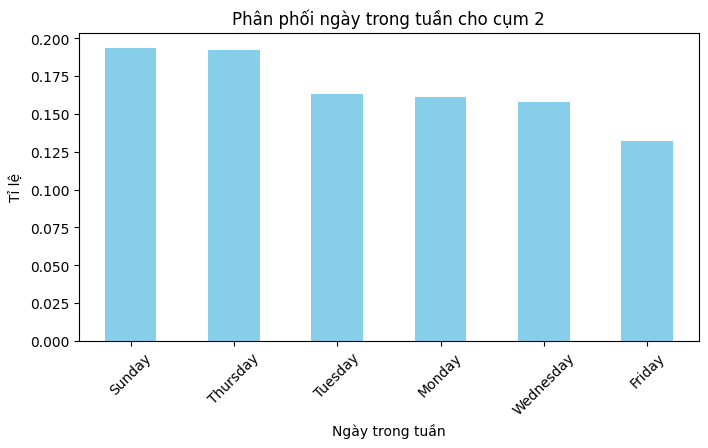


Phân bố giờ trong ngày (top 5):
Giờ
12    0.171594
13    0.170302
14    0.159616
11    0.110526
15    0.106441
Name: proportion, dtype: float64


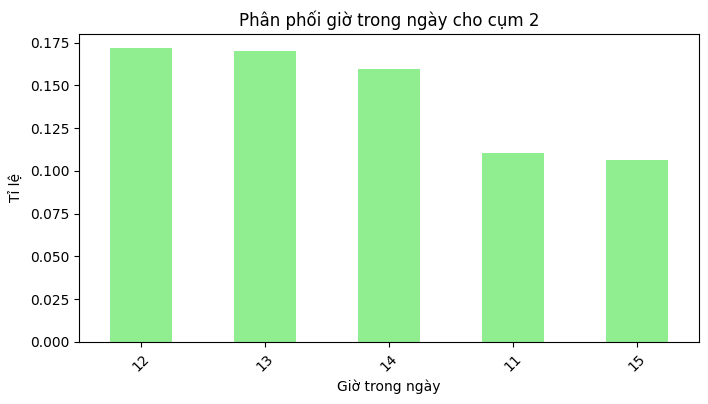


Phân bố tháng trong năm:
Tháng
November     0.263207
October      0.196854
September    0.128286
August       0.074846
July         0.062233
December     0.054132
June         0.044439
March        0.043851
May          0.040712
April        0.036431
February     0.029345
January      0.025664
Name: proportion, dtype: float64


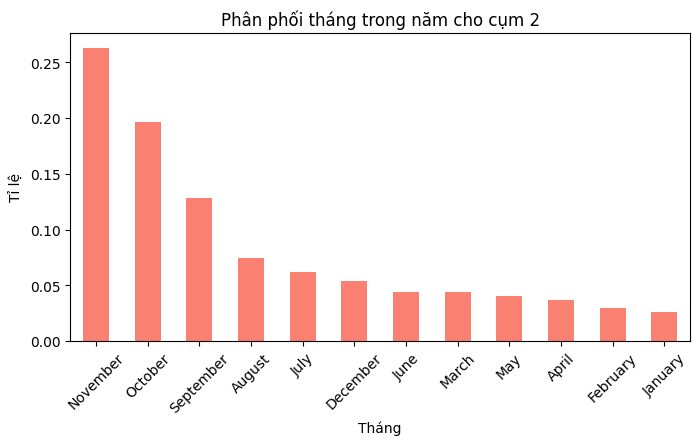

In [ ]:
analyze_time_behavior(df,2)

- Cụm 2 - Khách hàng có tiềm năng có giao dịch tập trung vào cuối tuần (Chủ Nhật) và giữa tuần (Thứ Năm), với giờ cao điểm là 12h-13h. Giao dịch tăng mạnh vào cuối năm, đặc biệt Tháng 11 (26.32%), và giảm mạnh vào đầu năm (Tháng 1-5). Điều này chứng tỏ nhóm này có xu hướng giao dịch mạnh vào cuối tuần và cuối năm, với sự gia tăng vượt trội vào Tháng 11 so với hai cụm còn lại.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả định dữ liệu đã có cột TotalPrice
df['TotalPrice'] = df['Quantity'] * df['Price']
# Removed suffixes
# Hàm phân tích giá trị giao dịch
def analyze_transaction_value(df, cluster_label):
    cluster_data = df[df['Cluster'] == cluster_label].copy()

    print(f"\n=== Phân tích giá trị giao dịch cho Cluster {cluster_label} ===")

    # Tính giá trị giao dịch theo hóa đơn và giữ lại Customer ID
    transaction_values = cluster_data.groupby('Invoice')['TotalPrice'].sum().reset_index()
    transaction_values = pd.merge(transaction_values, cluster_data[['Invoice', 'Customer ID']], on='Invoice', how='left')

    # 1. Giá trị trung bình và trung vị
    avg_transaction_value = transaction_values['TotalPrice'].mean()
    median_transaction_value = transaction_values['TotalPrice'].median()
    print(f"Giá trị trung bình mỗi giao dịch: {avg_transaction_value:.2f} GBP")
    print(f"Giá trị trung vị mỗi giao dịch: {median_transaction_value:.2f} GBP")

    # 2. Histogram với giá trị thực và tỷ lệ log
    plt.figure(figsize=(10, 5))
    plt.hist(transaction_values['TotalPrice'], bins=50, color='skyblue', edgecolor='black')
    plt.xscale('log')  # Áp dụng tỷ lệ logarit trên trục x
    plt.title(f'Histogram of Transaction Values for Cluster {cluster_label} (Log Scale)')
    plt.xlabel('Total Price (GBP, Log Scale)')
    plt.ylabel('Frequency')
    plt.grid(True, which="both", ls="--")
    plt.show()

    # 4. Tỷ lệ giao dịch lớn (trên phân vị 75%)
    large_transaction_threshold = transaction_values['TotalPrice'].quantile(0.75)
    large_transaction_ratio = (transaction_values['TotalPrice'] > large_transaction_threshold).mean()
    print(f"Tỷ lệ giao dịch lớn (trên phân vị 75%): {large_transaction_ratio:.2%}")
    print(f"Ngưỡng giao dịch lớn (phân vị 75%): {large_transaction_threshold:.2f} GBP")



=== Phân tích giá trị giao dịch cho Cluster 0 ===
Giá trị trung bình mỗi giao dịch: 443.58 GBP
Giá trị trung vị mỗi giao dịch: 308.58 GBP


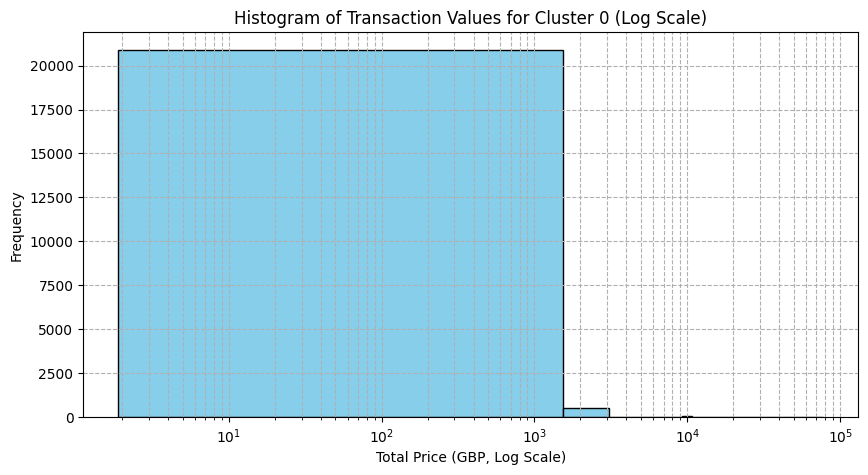

Tỷ lệ giao dịch lớn (trên phân vị 75%): 24.93%
Ngưỡng giao dịch lớn (phân vị 75%): 510.73 GBP


In [ ]:
analyze_transaction_value(df, 0)

- Trung vị 308.58 GBP thấp hơn trung bình 443.58 GBP, cho thấy phân bố lệch phải với một số giao dịch giá trị cao kéo trung bình lên. Tỷ lệ 24.93% giao dịch lớn hơn 510.73 GBP  xác nhận một phần đáng kể giao dịch ở mức cao. Histogram log scale cho thấy phần lớn giao dịch tập trung từ 1 GBP đến 1000 GBP, với mật độ cao ở 100 GBP và 1000 GBP, nhưng các giao dịch lớn hơn  rất hiếm, có thể bị phân bố vào các bin lớn hơn (10⁴ hoặc 10⁵) với tần suất thấp.
- Giá trị giao dịch của nhóm này phân bố rộng từ 1 GBP đến 1000 GBP, với mật độ cao ở 100 GBP và 1000 GBP, chiếm phần lớn tần suất (trung vị 308.58 GBP). Tuy nhiên, 24.93% giao dịch lớn hơn 510.73 GBP, với trung bình 443.58 GBP, cho thấy sự hiện diện của các giao dịch giá trị cao, và giá trị tối đa có thể tồn tại nhưng cực kỳ hiếm, không nổi bật trên histogram log scale.


=== Phân tích giá trị giao dịch cho Cluster 1 ===
Giá trị trung bình mỗi giao dịch: 864.05 GBP
Giá trị trung vị mỗi giao dịch: 441.10 GBP


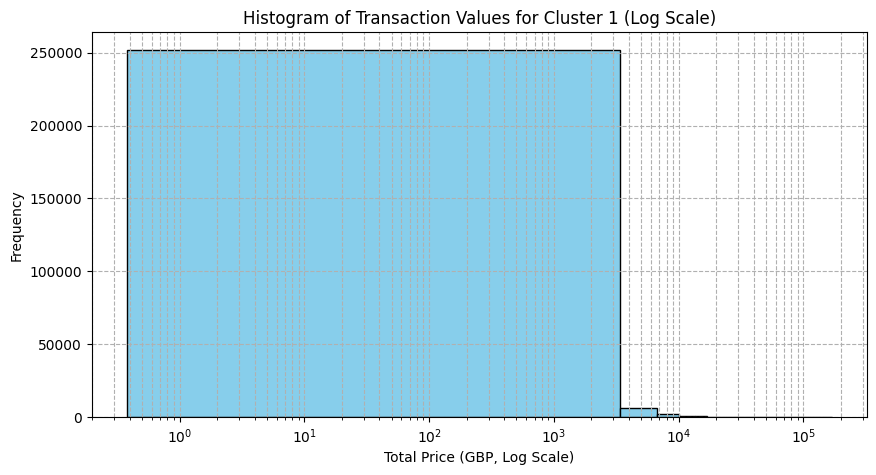

Tỷ lệ giao dịch lớn (trên phân vị 75%): 24.99%
Ngưỡng giao dịch lớn (phân vị 75%): 785.79 GBP


In [ ]:
analyze_transaction_value(df, 1)

- Trung vị 441.10 GBP thấp hơn trung bình 864.05 GBP, cho thấy phân bố lệch phải với nhiều giao dịch giá trị cao kéo trung bình lên. Tỷ lệ 24.99% giao dịch lớn hơn 785.79 GBP cao nhất trong 3 cụm, cho thấy nhóm này có nhiều giao dịch giá trị lớn. Histogram log scale cho thấy phần lớn giao dịch tập trung gần 0 GBP, nhưng các giao dịch từ 10⁴  đến 10⁵ tồn tại, dù rất hiếm.
- Giá trị giao dịch của nhóm này chủ yếu tập trung gần 0 GBP (trung vị 441.10 GBP), nhưng trung bình cao (864.05 GBP) và 24.99% giao dịch trên 785.79 GBP cho thấy xu hướng chi tiêu lớn. Các giao dịch từ 10,000 GBP đến 175,000 GBP xuất hiện trên histogram log scale, nhưng số lượng rất ít, phản ánh tính chất ngoại lai.


=== Phân tích giá trị giao dịch cho Cluster 2 ===
Giá trị trung bình mỗi giao dịch: 446.28 GBP
Giá trị trung vị mỗi giao dịch: 322.53 GBP


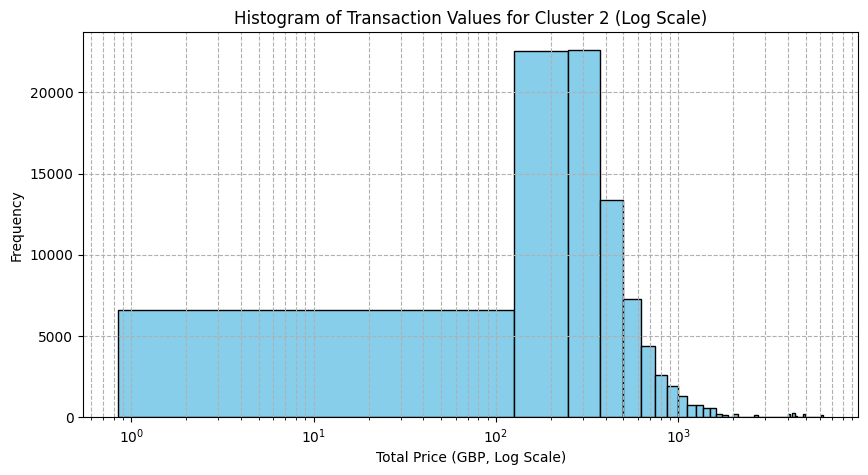

Tỷ lệ giao dịch lớn (trên phân vị 75%): 24.93%
Ngưỡng giao dịch lớn (phân vị 75%): 497.14 GBP


In [ ]:
analyze_transaction_value(df, 2)

-  Trung vị 322.53 GBP thấp hơn trung bình 446.28 GBP, cho thấy phân bố lệch phải với một số giao dịch giá trị cao kéo trung bình lên. Tỷ lệ 24.93% giao dịch lớn hơn 497.14 GBP cho thấy một phần đáng kể giao dịch ở mức cao. Histogram log scale cho thấy phân bố đều hơn, với tần suất đáng kể từ 10 GBP đến 1000 GBP, và các giao dịch lớn hơn  rất hiếm.
- Giá trị giao dịch của nhóm này phân bố rộng từ 1 GBP đến 1000 GBP, với tần suất cao ở 100 GBP và 1000 GBP, chiếm phần lớn (trung vị 322.53 GBP). Trung bình 446.28 GBP và 24.93% giao dịch trên 497.14 GBP cho thấy khả năng chi tiêu cao, nhưng số lượng giao dịch lớn rất ít.

**Đánh giá hành vi của từng cụm khách hàng**


- Cụm 0: Khách hàng ngủ đông
 + Giao dịch của khách hàng tập trung chủ yếu vào giữa tuần, đặc biệt là Thứ Năm (chiếm 22.28%), và khung giờ từ 12h đến 15h, với đỉnh điểm vào lúc 12h (16.81%). Phần lớn các giao dịch có giá trị từ 1 GBP đến 1000 GBP, với trung vị là 308.58 GBP. Đáng chú ý, 24.93% giao dịch có giá trị cao hơn 510.73 GBP, thường diễn ra trong giai đoạn đầu năm, đặc biệt là Tháng 3 (17.86%).

 + Tuy nhiên, từ Tháng 6 trở đi, hoạt động giao dịch của nhóm này giảm mạnh, gần như "ngủ đông" với tỷ lệ cực thấp trong Tháng 8 (chỉ 0.51%). Điều này cho thấy nhóm khách hàng này có xu hướng “thức dậy” vào đầu năm với cả các giao dịch nhỏ và một số giao dịch lớn đột biến (lên đến 80,000 GBP), sau đó dần rơi vào trạng thái không hoạt động vào giữa và cuối năm.
 + Điều này cho thấy Cụm 0 có hành vi giao dịch không đều, chỉ hoạt động mạnh vào đầu năm (Tháng 3) với phần lớn giao dịch từ 1 GBP đến 1000 GBP, nhưng cũng có 24.93% giao dịch lớn hơn 510.73 GBP, bao gồm các giao dịch giá trị cao hiếm hoi (tối đa 80,000 GBP). Sự tập trung vào Thứ Năm và giờ 12h-15h trong giai đoạn này phản ánh một mô hình hoạt động cố định nhưng hạn chế, phù hợp với đặc điểm "ngủ đông" trong phần lớn thời gian còn lại.
- Cụm 1: Khách hàng VIP trung thành
 + Giao dịch của nhóm này diễn ra đều đặn trong suốt tuần, với tâm điểm rơi vào Thứ Năm (20.04%) và khung giờ từ 12h đến 15h, đặc biệt là 12h trưa (18.55%), cho thấy thói quen giao dịch ổn định và có tính chu kỳ rõ ràng.

 + Điểm đáng chú ý là giao dịch tăng mạnh vào cuối năm, đặc biệt trong Tháng 11 (15.83%), gợi ý đây là thời điểm "cao trào mua sắm" của nhóm. Các giao dịch có giá trị trên 785.79 GBP chiếm 24.99%, với mức chi tiêu trung bình lên tới 864.05 GBP và có thể đạt đỉnh tới 175,000 GBP, thể hiện khả năng chi tiêu mạnh và có trọng điểm.

 + Nhóm này có thể được xem như "bùng nổ cuối năm", với hành vi chi tiêu cao, đều đặn, tập trung vào các thời điểm chiến lược – phản ánh sức mua lớn, ổn định và có mục tiêu rõ ràng.
 + Điều này cho thấy Cụm 1 có hành vi giao dịch ổn định quanh năm, với phần lớn giao dịch gần 0 GBP, nhưng tăng mạnh về giá trị (24.99% trên 785.79 GBP, tối đa 175,000 GBP) vào cuối năm (Tháng 11). Sự tập trung vào Thứ Năm và giờ 12h-15h, cùng với chi tiêu lớn vào thời điểm cao điểm, phản ánh đặc điểm trung thành và khả năng chi tiêu cao của nhóm "VIP".
- Cụm 2: Khách hàng có tiềm năng
 + Nhóm khách hàng này có xu hướng hoạt động mạnh vào cuối tuần (Chủ Nhật, 19.38%) và giữa tuần (Thứ Năm, 19.21%), đặc biệt tập trung trong khung giờ 12h-13h – thời điểm ghi nhận tỷ lệ giao dịch cao nhất (17.16% và 17.03%). Giá trị giao dịch chủ yếu nằm trong khoảng 1 – 1000 GBP, với trung vị 322.53 GBP, cho thấy nhóm này hoạt động với mức chi tiêu vừa phải.

 + Tuy nhiên, điều đáng chú ý là vào những giai đoạn cao điểm cuối năm (Tháng 11 chiếm 26.32%), nhóm này bắt đầu gia tăng giao dịch có giá trị lớn hơn 497.14 GBP (chiếm 24.93%), với mức tối đa đạt tới 6000 GBP, phản ánh tiềm năng chi tiêu đáng kể khi đúng thời điểm.

 + Hành vi tiêu dùng này có thể được hiểu như một “sự trỗi dậy theo mùa”, khi nhóm khách hàng này giữ mức chi tiêu ổn định trong năm nhưng sẵn sàng bùng nổ vào giai đoạn mua sắm cao điểm, thể hiện khả năng phát triển mạnh nếu được kích hoạt đúng cách.
 + Điều này cho thấy Cụm 2 có hành vi giao dịch ổn định quanh năm, với phần lớn giao dịch từ 1 GBP đến 1000 GBP, nhưng tăng mạnh về giá trị (24.93% trên 497.14 GBP, tối đa 6000 GBP) vào cuối năm (Tháng 11). Sự tập trung vào Chủ Nhật và Thứ Năm, cùng với chi tiêu cao hơn vào thời điểm cao điểm, phản ánh tiềm năng phát triển chi tiêu của nhóm

**Chiến lược CSKH và phương án xử lý**
- Cụm 0: Khách hàng ngủ đông
 + Chiến lược CSKH:
   + Tập trung kích hoạt giao dịch vào đầu năm (Tháng 1-5, đặc biệt Tháng 3) khi nhóm này "thức dậy", bằng cách đẩy mạnh tiếp cận vào Thứ Năm và khung giờ 12h-15h, thời điểm họ hoạt động mạnh nhất.
Tận dụng 24.93% giao dịch lớn hơn 510.73 GBP (trung bình 443.58 GBP) để khuyến khích các giao dịch giá trị cao, đặc biệt nhắm đến các giao dịch ngoại lai (tối đa 80,000 GBP) trong giai đoạn đầu năm.
 + Phương án xử lý:
   + Gửi thông báo hoặc ưu đãi đặc biệt vào đầu năm (Tháng 1-3), đặc biệt vào Thứ Năm từ 12h-15h, để khuyến khích giao dịch sớm, tránh "ngủ đông" kéo dài.
Cung cấp ưu đãi cho các giao dịch lớn (trên 510.73 GBP) trong Tháng 3, nhằm tăng tần suất và giá trị giao dịch, đồng thời kéo dài thời gian hoạt động của nhóm sang các tháng sau (Tháng 6-8).

   + Để giải quyết tình trạng "ngủ đông" từ Tháng 6 trở đi (Tháng 8: 0.51%), thử nghiệm các chiến dịch kích hoạt nhỏ (ví dụ: ưu đãi thử nghiệm) vào giữa năm, nhắm vào Thứ Năm và giờ 12h-15h, nhằm đánh thức nhóm này.
- Cụm 1: Khách hàng VIP trung thành
  + Chiến lược CSKH:
     + Duy trì sự trung thành bằng cách tiếp cận thường xuyên vào Thứ Năm và khung giờ 12h-15h, thời điểm nhóm này giao dịch đều đặn quanh năm.
     + Tập trung đẩy mạnh giao dịch giá trị cao (24.99% trên 785.79 GBP, tối đa 175,000 GBP) vào cuối năm (Tháng 9-11, đặc biệt Tháng 11), khi nhóm này có xu hướng chi tiêu lớn nhất.
 + Phương án xử lý:
     + Cung cấp chương trình ưu đãi đặc biệt dành riêng cho "VIP" vào Thứ Năm từ 12h-15h, đặc biệt trong Tháng 11, để khuyến khích các giao dịch lớn (trên 785.79 GBP), tận dụng trung bình cao 864.05 GBP.
     + Gửi thông báo nhắc nhở hoặc ưu đãi cá nhân hóa quanh năm, đặc biệt vào Thứ Năm, để duy trì tần suất giao dịch và tăng giá trị giao dịch trung bình.
     + Để tăng giao dịch trong các tháng thấp điểm (Tháng 12: 4.79%), triển khai ưu đãi kéo dài từ Tháng 11 sang Tháng 12, nhắm đến các giao dịch giá trị cao, nhằm duy trì sự trung thành của nhóm.
- Cụm 2: Khách hàng có tiềm năng
 + Chiến lược CSKH:
   + Tận dụng tiềm năng tăng giá trị giao dịch (24.93% trên 497.14 GBP, tối đa 6000 GBP) bằng cách tập trung tiếp cận vào cuối tuần (Chủ Nhật, 19.38%) và giữa tuần (Thứ Năm, 19.21%), khung giờ 12h-13h, đặc biệt vào cuối năm (Tháng 11, 26.32%).
   + Khuyến khích giao dịch đều đặn quanh năm để tăng tần suất, đồng thời thúc đẩy các giao dịch lớn hơn vào thời điểm cao điểm.
 + Phương án xử lý:
   + Triển khai ưu đãi đặc biệt vào Chủ Nhật và Thứ Năm từ 12h-13h, đặc biệt trong Tháng 11, để khuyến khích các giao dịch lớn hơn 497.14 GBP, tận dụng tiềm năng chi tiêu cao (trung bình 446.28 GBP).
   + Gửi thông báo nhắc nhở hoặc ưu đãi nhỏ quanh năm, nhắm vào Chủ Nhật và Thứ Năm, để duy trì tần suất giao dịch và tăng giá trị giao dịch trung bình từ mức trung vị 322.53 GBP.
   + Để tăng giao dịch trong các tháng thấp điểm (Tháng 1-5, ví dụ Tháng 1: 2.57%), triển khai ưu đãi thử nghiệm vào đầu năm, nhắm đến khung giờ 12h-13h, nhằm kích thích nhóm này giao dịch thường xuyên hơn, từ đó khai thác tiềm năng phát triển.